In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
titanic = "./data/titanic.csv"
titanic_data = pd.read_csv(titanic)

In [3]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 数据预处理，填空值
titanic_data = titanic_data.fillna(method="bfill")
titanic_data = titanic_data.dropna()

In [5]:
# 生成label，data
y = titanic_data.pop("Survived")
X = titanic_data

In [6]:
X.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [7]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 11)
(178, 11)
(712,)
(178,)


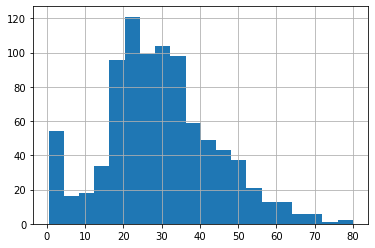

In [9]:
# 年龄分布
titanic_data.Age.hist(bins=20)

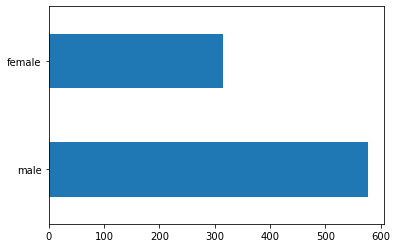

In [10]:
# 性别分布
titanic_data.Sex.value_counts().plot(kind="barh")

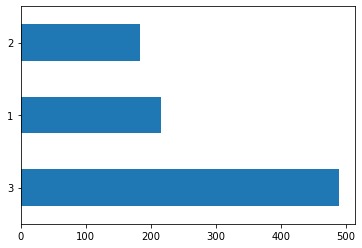

In [11]:
# 头等舱等别分布
titanic_data.Pclass.value_counts().plot(kind="barh")

In [12]:
# 生成dataset
def make_dataset(X, y, shuffle=True, batch_size=32):
    # from_tensor_slices
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
        dataset = dataset.shuffle(100)
    dataset = dataset.batch(batch_size)
    return dataset

In [13]:
train_dataset = make_dataset(X_train, y_train, batch_size=5)

for x, y in train_dataset.take(1):
    print(x)
    print(y)

{'PassengerId': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([685, 124, 791, 618, 758], dtype=int64)>, 'Pclass': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 2, 3, 3, 2], dtype=int64)>, 'Name': <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Brown, Mr. Thomas William Solomon', b'Webber, Miss. Susan',
       b'Keane, Mr. Andrew "Andy"',
       b'Lobb, Mrs. William Arthur (Cordelia K Stanlick)',
       b'Bailey, Mr. Percy Andrew'], dtype=object)>, 'Sex': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'male', b'female', b'male', b'female', b'male'], dtype=object)>, 'Age': <tf.Tensor: shape=(5,), dtype=float64, numpy=array([60. , 32.5, 16. , 26. , 18. ])>, 'SibSp': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 0, 0, 1, 0], dtype=int64)>, 'Parch': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 0, 0, 0, 0], dtype=int64)>, 'Ticket': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'29750', b'27267', b'12460', b'A/5. 3336', b'29108'], dtype=object)>, 'Far

In [14]:
# 生成标签类，分为分类与数值
feature_columns = []
category_columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
numeric_columns = ["Age", "Fare"]

# 类别：生成one-hot编码
for category in category_columns:
    vocab = titanic_data[category].unique()
    print(category, vocab)
    feature_columns.append(
            tf.feature_column.indicator_column(
                tf.feature_column.categorical_column_with_vocabulary_list(category, vocab)))
    
for numeric in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(numeric))

Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']


In [15]:
# 测试标签
pclass_colum =  feature_columns[0]
age_colum =  feature_columns[5]

for x, y in train_dataset.take(1):
    print(tf.keras.layers.DenseFeatures(pclass_colum)(x).numpy())
    print(tf.keras.layers.DenseFeatures(age_colum)(x).numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing au

In [16]:
# 模型测试
train_dataset = make_dataset(X_train, y_train)
val_dataset = make_dataset(X_test, y_test)

# method1:model.fit()
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2)
])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

batch_size= 32
history = model.fit(train_dataset.repeat(),   # 加上repeat
                    validation_data = val_dataset,
                    steps_per_epoch = 20,
                    validation_steps = 6,
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.
 1/20 [>.............................] - ETA: 0s - loss: 28.7908WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'PassengerId': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int64>, 'Pclass': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'Name': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) d

In [17]:
# method2:model -> estimator -> train
estimator = keras.estimator.model_to_estimator(model)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
Note that this doesn't affect the state of the model instance you passed as `keras_model` argument.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\xuj41\\AppData\\Local\\Temp\\tmpdazk3s9n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_i

In [18]:
#estimator.train(input_fn = lambda : make_dataset(X_train, y_train)